# Exercise 4: How many clusters of grain?

In the video, you learnt how to choose a good number of clusters for a dataset using the k-means inertia graph.  You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

This dataset was obtained from the [UCI](https://archive.ics.uci.edu/ml/datasets/seeds).

From the course _Transition to Data Science_. [Buy the entire course for just $10](https://www.udemy.com/transition-to-data-science-in-python/?couponCode=CLUSTER-NBS) for many more exercises and helpful video lectures.

**Step 1:** Load the dataset _(written for you)_.

In [1]:
import pandas as pd

seeds_df = pd.read_csv('../datasets/seeds.csv')
# forget about the grain variety for the moment - we'll use this later
del seeds_df['grain_variety']

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [2]:
seeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   length                 210 non-null    float64
 4   width                  210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [4]:
seed_values = seeds_df.values

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [17]:

model = KMeans(n_clusters=k,random_state=0).fit(seed_values)
model
inertias = []  # 存放每次结果的误差平方和
for k in range(1,11):
    model = KMeans(n_clusters=k)  # 构造聚类器
    model.fit(seed_values)
    inertias.append(model.inertia_)# inertia簇内误差平方和

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

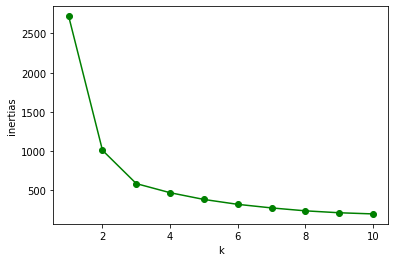

In [18]:
X = range(1,11)
plt.xlabel('k')
plt.ylabel('inertias')
plt.plot(X,inertias,'go-')
plt.show()

**Excellent work!** You can see from the graph that 3 is a good number of clusters, since these are points where the inertia begins to decrease more slowly.